# **Car Price Prediction Using Linear Regression**

-------------

## **Objective: To develop and evaluate a linear regression model (Ordinary Least Sqaure) that accurately predicts car prices based on a given dataset.**

--------------

## **Import Library**

In [1]:
import pandas as pd
import numpy as np

# Import Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

## **Import Data**

In [2]:
car = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Car%20Price.csv')

## **Explore Data**

**First Five Rows**

In [3]:
car.head()

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,Maruti,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


**Shape of the dataset**

In [4]:
car.shape

(4340, 9)

**Information of the dataset**

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          4340 non-null   object
 1   Model          4340 non-null   object
 2   Year           4340 non-null   int64 
 3   Selling_Price  4340 non-null   int64 
 4   KM_Driven      4340 non-null   int64 
 5   Fuel           4340 non-null   object
 6   Seller_Type    4340 non-null   object
 7   Transmission   4340 non-null   object
 8   Owner          4340 non-null   object
dtypes: int64(3), object(6)
memory usage: 305.3+ KB


**Describe the dataset**

In [6]:
car.describe()

,Year,Selling_Price,KM_Driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


**Data Types in the dataset**

In [7]:
car.dtypes

Brand            object
Model            object
Year              int64
Selling_Price     int64
KM_Driven         int64
Fuel             object
Seller_Type      object
Transmission     object
Owner            object
dtype: object

**Identifying Missing Values**

In [8]:
car.isnull()

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4335,False,False,False,False,False,False,False,False,False
4336,False,False,False,False,False,False,False,False,False
4337,False,False,False,False,False,False,False,False,False
4338,False,False,False,False,False,False,False,False,False


In [9]:
car.isnull().sum()

Brand            0
Model            0
Year             0
Selling_Price    0
KM_Driven        0
Fuel             0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

## **Data Preprocessing**

In [10]:
# Adding Age Column
car['Age'] = 2024 - car['Year']
car.drop('Year', axis=1, inplace=True)

In [11]:
car.head()

,Brand,Model,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner,Age
0,Maruti,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,First Owner,17
1,Maruti,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,Manual,First Owner,17
2,Hyundai,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,Manual,First Owner,12
3,Datsun,Datsun RediGO T Option,250000,46000,Petrol,Individual,Manual,First Owner,7
4,Honda,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,Manual,Second Owner,10


**Outlier Visualization**

<Axes: xlabel='Selling_Price'>

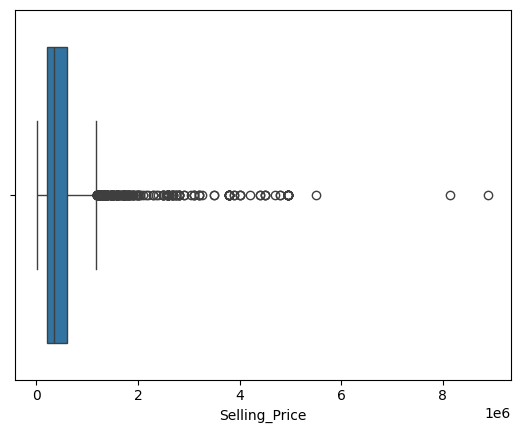

In [12]:
sns.boxplot(x='Selling_Price', data=car)

<Axes: xlabel='KM_Driven'>

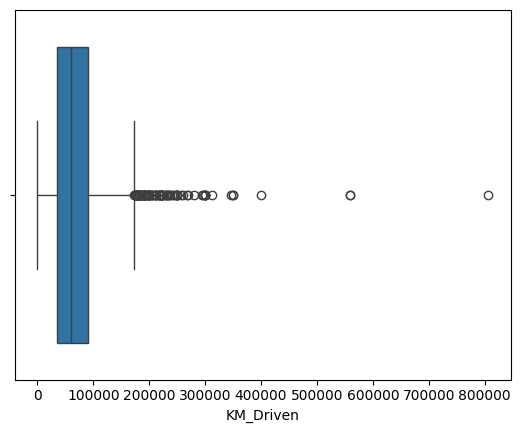

In [13]:
sns.boxplot(x='KM_Driven', data=car)

<Axes: xlabel='Age'>

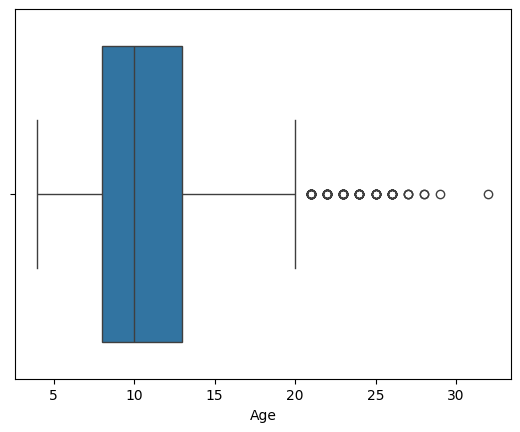

In [14]:
sns.boxplot(x='Age', data=car)

In [15]:
car1 = car.copy()
car1.shape

(4340, 9)

In [16]:
car1.head(1)

,Brand,Model,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner,Age
0,Maruti,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,First Owner,17


In [17]:
numeric_cols = car1.select_dtypes(include=[float, int]).columns

# Calculate Q1, Q3, and IQR for each numeric column
Q1 = car1[numeric_cols].quantile(0.25)
Q3 = car1[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
IQR

Selling_Price    391250.25
KM_Driven         55000.00
Age                   5.00
dtype: float64

In [18]:
outliers = car1[((car1[numeric_cols] < (Q1 - 1.5 * IQR)) | (car1[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
outliers

,Brand,Model,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner,Age
12,Toyota,Toyota Corolla Altis 1.8 VL CVT,1650000,25000,Petrol,Dealer,Automatic,First Owner,6
25,Toyota,Toyota Corolla Altis 1.8 VL CVT,1650000,25000,Petrol,Dealer,Automatic,First Owner,6
27,Hyundai,Hyundai Venue SX Opt Diesel,1195000,5000,Diesel,Dealer,Manual,First Owner,5
29,Jaguar,Jaguar XF 2.2 Litre Luxury,1964999,28000,Diesel,Dealer,Automatic,First Owner,10
30,Mercedes-Benz,Mercedes-Benz New C-Class 220 CDI AT,1425000,59000,Diesel,Dealer,Automatic,First Owner,11
...,...,...,...,...,...,...,...,...,...
4304,Audi,Audi Q5 3.0 TDI Quattro Technology,3899000,22000,Diesel,Dealer,Automatic,First Owner,6
4311,Toyota,Toyota Camry Hybrid 2.5,1900000,20118,Petrol,Dealer,Automatic,First Owner,7
4313,Ford,Ford Endeavour 2.2 Titanium AT 4X2,2800000,10000,Diesel,Individual,Automatic,First Owner,5
4325,Maruti,Maruti Alto LXi,65000,90000,Petrol,Individual,Manual,Second Owner,24


In [19]:
out = car1[~((car1[numeric_cols] < (Q1 - 1.5 * IQR)) | (car1[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
car = out.copy()
car.shape

(3858, 9)

## **Data Visualization**

In [20]:
car.Model.value_counts()

Model
Maruti Swift Dzire VDI                  68
Maruti Alto 800 LXI                     59
Maruti Alto LXi                         45
Hyundai EON Era Plus                    35
Maruti Alto LX                          33
                                        ..
Tata Indigo CS LS (TDI) BS-III           1
Honda Amaze S Petrol BSIV                1
Hyundai Santro Xing XS eRLX Euro III     1
Hyundai Santro AT                        1
Chevrolet Spark 1.0 LT BS3               1
Name: count, Length: 1317, dtype: int64

C:\Users\Anjana\AppData\Local\Temp\ipykernel_12180\4039166907.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Seller_Type', y='Selling_Price', data=car, palette='muted')
C:\Users\Anjana\AppData\Local\Temp\ipykernel_12180\4039166907.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Transmission', y='Selling_Price', data=car, palette='muted')
C:\Users\Anjana\AppData\Local\Temp\ipykernel_12180\4039166907.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Fuel', y='Selling_Price', data=car, palette='muted')


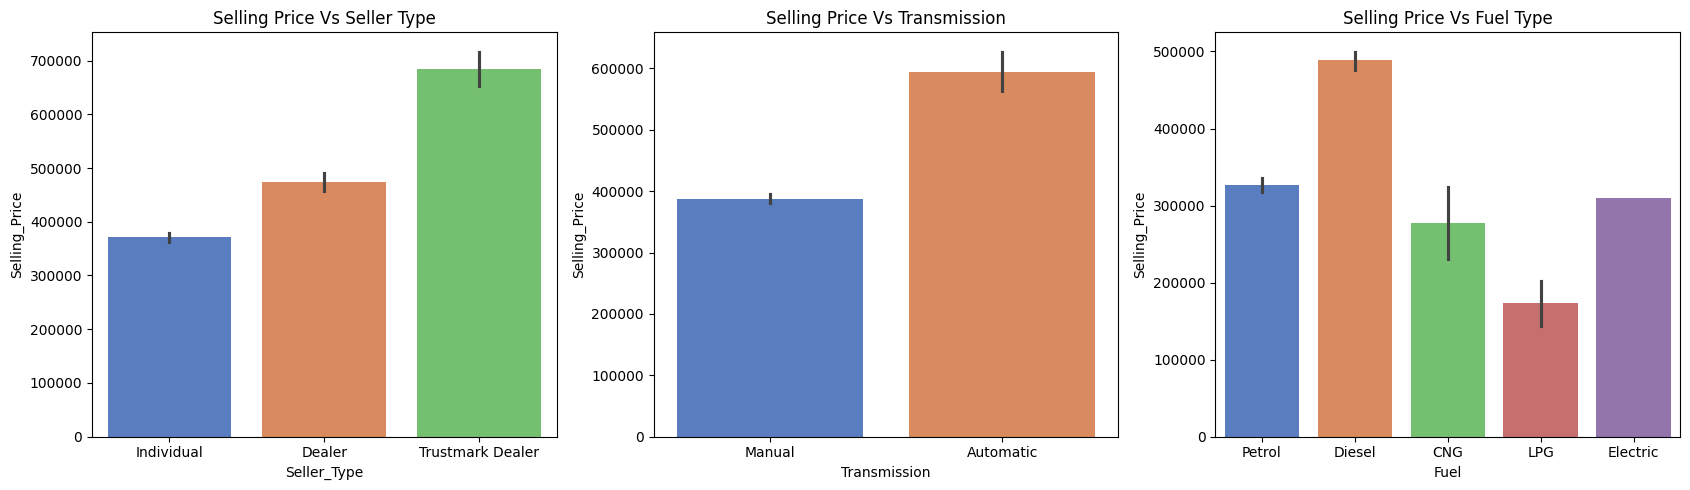

In [21]:
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.barplot(x='Seller_Type', y='Selling_Price', data=car, palette='muted')
plt.title('Selling Price Vs Seller Type')

plt.subplot(1,3,2)
sns.barplot(x='Transmission', y='Selling_Price', data=car, palette='muted')
plt.title('Selling Price Vs Transmission')

plt.subplot(1,3,3)
sns.barplot(x='Fuel', y='Selling_Price', data=car, palette='muted')
plt.title('Selling Price Vs Fuel Type')

plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

C:\Users\Anjana\AppData\Local\Temp\ipykernel_12180\1755409216.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Owner', y='Selling_Price', data=car, palette='deep')


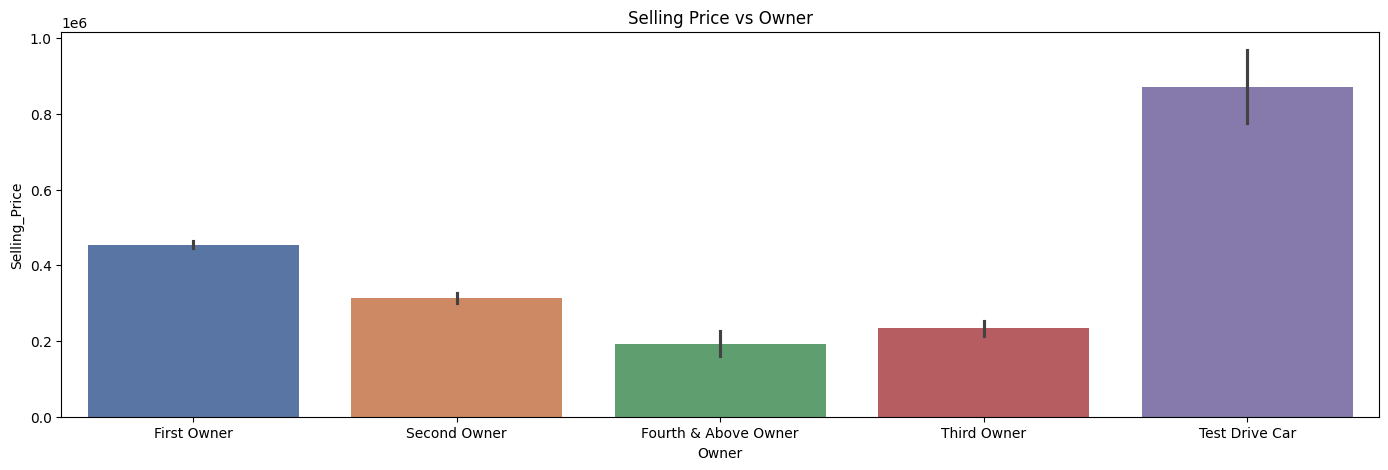

In [22]:
#Selling_Price and Owner Visualization with target variable
plt.figure(figsize=[17,5])
sns.barplot(x='Owner', y='Selling_Price', data=car, palette='deep')
plt.title('Selling Price vs Owner')
plt.show()

C:\Users\Anjana\AppData\Local\Temp\ipykernel_12180\983884820.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age', y='Selling_Price', data=car, palette='colorblind')


<Axes: xlabel='Age', ylabel='Selling_Price'>

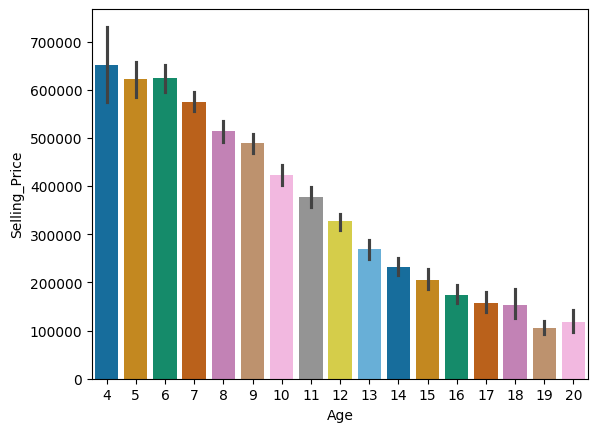

In [23]:
sns.barplot(x='Age', y='Selling_Price', data=car, palette='colorblind')

**Encoding of Categorical Features**

In [24]:
car.head()

,Brand,Model,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner,Age
0,Maruti,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,First Owner,17
1,Maruti,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,Manual,First Owner,17
2,Hyundai,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,Manual,First Owner,12
3,Datsun,Datsun RediGO T Option,250000,46000,Petrol,Individual,Manual,First Owner,7
4,Honda,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,Manual,Second Owner,10


In [25]:
car = car.drop(['Model', 'Brand'], axis=1)

In [26]:
car.replace({'Fuel':{'Petrol':0, 'Diesel':1, 'CNG':2, 'LPG':3, 'Electric':4}},inplace=True)
car['Fuel'].unique()

C:\Users\Anjana\AppData\Local\Temp\ipykernel_12180\2821385575.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car.replace({'Fuel':{'Petrol':0, 'Diesel':1, 'CNG':2, 'LPG':3, 'Electric':4}},inplace=True)


array([0, 1, 2, 3, 4])

In [27]:
car.replace({'Seller_Type':{'Individual':0, 'Dealer':1, 'Trustmark Dealer':2}},inplace=True)
car['Seller_Type'].unique()

C:\Users\Anjana\AppData\Local\Temp\ipykernel_12180\2513999795.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car.replace({'Seller_Type':{'Individual':0, 'Dealer':1, 'Trustmark Dealer':2}},inplace=True)


array([0, 1, 2])

In [28]:
car.replace({'Transmission':{'Manual':0, 'Automatic':1}},inplace=True)
car['Transmission'].unique()

C:\Users\Anjana\AppData\Local\Temp\ipykernel_12180\433944451.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car.replace({'Transmission':{'Manual':0, 'Automatic':1}},inplace=True)


array([0, 1])

In [29]:
car.replace({'Owner':{'First Owner':0, 'Second Owner':1, 'Third Owner':2, 'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)
car['Owner'].unique()

C:\Users\Anjana\AppData\Local\Temp\ipykernel_12180\1399218231.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car.replace({'Owner':{'First Owner':0, 'Second Owner':1, 'Third Owner':2, 'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)


array([0, 1, 3, 2, 4])

In [30]:
car.head()

,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner,Age
0,60000,70000,0,0,0,0,17
1,135000,50000,0,0,0,0,17
2,600000,100000,1,0,0,0,12
3,250000,46000,0,0,0,0,7
4,450000,141000,1,0,0,1,10


**Correlation Visualization**

In [31]:
corr_matrix = car.corr()
corr_matrix

,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner,Age
Selling_Price,1.000000,-0.281465,0.251182,0.242155,0.205949,-0.266381,-0.633056
KM_Driven,-0.281465,1.000000,0.331730,-0.218001,-0.118956,0.314694,0.496905
Fuel,0.251182,0.331730,1.000000,-0.015297,-0.075752,0.041113,-0.037847
Seller_Type,0.242155,-0.218001,-0.015297,1.000000,0.127511,-0.201869,-0.147772
Transmission,0.205949,-0.118956,-0.075752,0.127511,1.000000,-0.043271,-0.092402
Owner,-0.266381,0.314694,0.041113,-0.201869,-0.043271,1.000000,0.380389
Age,-0.633056,0.496905,-0.037847,-0.147772,-0.092402,0.380389,1.000000


<Axes: >

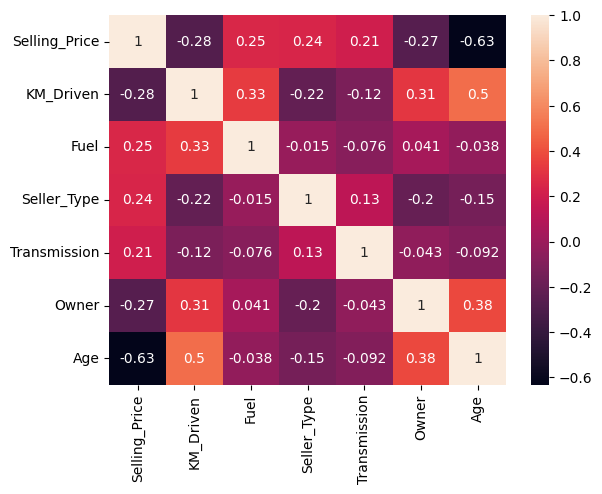

In [32]:
sns.heatmap(corr_matrix, annot=True)

## **Define Target Variable (y) and Feature Variables (X)**

In [33]:
car.columns

Index(['Selling_Price', 'KM_Driven', 'Fuel', 'Seller_Type', 'Transmission',
       'Owner', 'Age'],
      dtype='object')

In [34]:
Y = car['Selling_Price']
X = car.drop('Selling_Price', axis=1)

## **Train Test Split**

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2529)

In [37]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((2700, 6), (1158, 6), (2700,), (1158,))

## **Modeling**

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
model = LinearRegression()

In [40]:
model.fit(X_train,Y_train)

LinearRegression()

In [41]:
model.intercept_

np.float64(727362.2469056658)

In [42]:
model.coef_

array([-1.35472094e-01,  1.11407329e+05,  7.27152989e+04,  1.77866121e+05,
       -4.66612092e+03, -3.75275770e+04])

## **Prediction**

In [43]:
Y_pred = model.predict(X_test)

In [44]:
Y_pred

array([530169.12751729,  36963.93031973, 340073.3076998 , ...,
       535839.51841626, 605387.88617705, 487474.17386216])

In [45]:
Y_pred.shape

(1158,)

## **Model Evaluation**

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [47]:
MSE = mean_squared_error(Y_test, Y_pred)
print('Test Mean Squared Error for test data: ', MSE)

Test Mean Squared Error for test data:  27942773236.181282


In [48]:
MAE = mean_absolute_error(Y_test, Y_pred)
print('Test Mean Absolute Error for test data: ', MAE)

Test Mean Absolute Error for test data:  127502.1681390775


In [49]:
R2 = r2_score(Y_test, Y_pred)
print('Test R2 Score for test data: ', R2)

Test R2 Score for test data:  0.507556507724682


## **Actual vs Predicted Results**

In [50]:
result = pd.DataFrame({'Actual': Y_test.values.flatten(), 'Predicted': Y_pred.flatten()})
result

,Actual,Predicted
0,480000,530169.127517
1,95000,36963.930320
2,550000,340073.307700
3,225000,235439.582922
4,110000,101332.121557
...,...,...
1153,90000,71180.107353
1154,225000,347344.953486
1155,430000,535839.518416
1156,910000,605387.886177


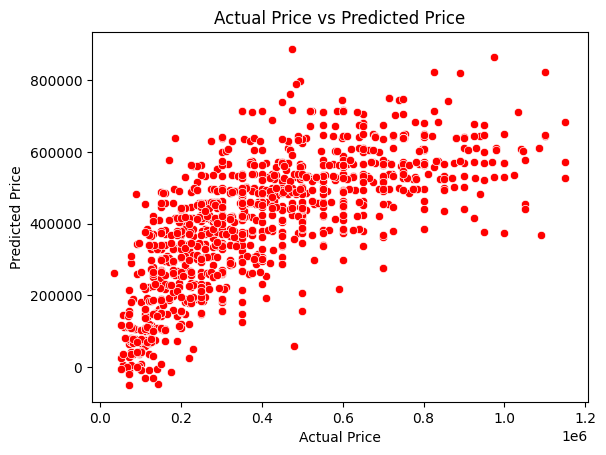

In [51]:
sns.scatterplot(x=Y_test, y=Y_pred,color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()